In [61]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, QuantileTransformer, OneHotEncoder#net yet used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
data = pd.read_csv('../dataset/heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
labelEncoder = LabelEncoder()
data['Sex'] = labelEncoder.fit_transform(data['Sex'])

In [7]:
data['ST_Slope'] = labelEncoder.fit_transform(data['ST_Slope'])

In [8]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,2,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,2,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,2,0


In [9]:
data['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RestingECG', ylabel='count'>

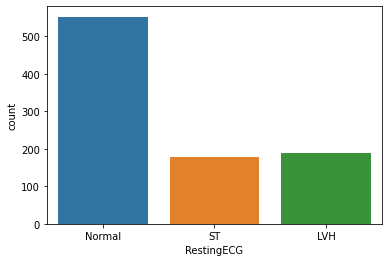

In [10]:
sns.countplot(data['RestingECG'])

In [11]:
data['RestingECG'] = labelEncoder.fit_transform(data['RestingECG'])


In [12]:
data['ChestPainType'] = labelEncoder.fit_transform(data['ChestPainType'])
data['ExerciseAngina'] = labelEncoder.fit_transform(data['ExerciseAngina'])

In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
#seperating the dataset
X = data.drop('HeartDisease', axis = 1)
y = data.HeartDisease

In [15]:
X_train, X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2, random_state =1)

In [16]:
# aplicationg of the scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Random forest

In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        74
           1       0.91      0.91      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

[[ 64  10]
 [ 10 100]]


SVM classifier

In [19]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [20]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184

[[ 65   9]
 [  8 102]]


Neural network

In [21]:
mlpc = MLPClassifier(hidden_layer_sizes=(22,22,22), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [22]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        74
           1       0.87      0.75      0.81       110

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184

[[62 12]
 [27 83]]


In [23]:
print(accuracy_score(y_test, pred_rfc))
print(accuracy_score(y_test, pred_clf))
print(accuracy_score(y_test, pred_mlpc))

0.8913043478260869
0.907608695652174
0.7880434782608695


In [24]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [25]:
newdata = [[30,1,2,120,200,2,2,150,0,1.5,1]]
newdata = sc.transform(newdata)
ynewdata = rfc.predict(newdata)
ynewdata

C:\Users\Bonas Nelson\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [26]:
knn = KNeighborsRegressor(n_neighbors = 10).fit(X_train, y_train)
pred_knn = knn.predict(X_test)
# print(classification_report(y_test, pred_knn))
# print(confusion_matrix(y_test, pred_knn))

In [27]:
print(accuracy_score(y_test, pred_rfc))

0.8913043478260869


In [28]:
pipe = Pipeline ([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [30]:
pipe.predict(X_test)

array([ 0.86773557,  1.02941529,  0.8797166 ,  0.80054776,  0.77981746,
        0.28165957,  0.40910423,  0.4112679 , -0.03759393,  0.3031588 ,
        0.11837631,  0.48626485,  0.21858545,  0.67204125,  0.98290772,
        0.12653216,  0.78714787,  0.2317773 ,  0.86674706,  0.65176789,
        0.65736948, -0.03726752,  1.25686729, -0.02232865,  0.50861513,
        0.80347324,  0.30060365,  0.53085764,  0.56580625,  0.1719537 ,
       -0.16722474, -0.0715186 ,  0.33383415, -0.01440428,  0.72514509,
        0.80850143,  0.74419804,  0.88006185,  0.02954974,  0.20927897,
        0.62339492,  0.96040961,  0.77015261,  0.38277024, -0.02906552,
       -0.15416888,  0.71679039,  0.22496354,  0.00393518,  1.03518095,
        0.17868153,  1.16526297,  1.04220292,  0.22442156,  0.64494435,
        0.17395678,  0.78808482,  0.0956227 ,  0.64100086,  0.20327724,
        0.97412957,  0.48557774,  0.65599091,  0.27760328,  0.12331666,
        1.1440923 ,  0.7433445 ,  0.63945602, -0.03974773,  0.84

In [32]:
pred_y = pipe.predict(X_test)

In [33]:
accuracy_score(y_test, np.round(abs(pred_y)))


0.8804347826086957

In [39]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': LinearRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__normalize': 'deprecated',
 'model__positive': False}

In [51]:
mod = GridSearchCV(estimator=pipe, param_grid={
   
}, cv =3)

In [52]:
mod.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={})

In [53]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008689,0.004935,0.002007,0.000819,{},0.41998,0.489646,0.512714,0.474114,0.039419,1


In [54]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [60]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [62]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [64]:
new_data = QuantileTransformer(n_quantiles=300).fit_transform(data)
pd.DataFrame(new_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.093645,1.0,0.633779,0.702341,0.849498,0.0,0.505017,0.913043,0.0,0.214047,1.000000,0.0
1,0.306020,0.0,0.841137,0.926421,0.267559,0.0,0.505017,0.754181,0.0,0.590301,0.319398,1.0
2,0.046823,1.0,0.633779,0.473244,0.826087,0.0,1.000000,0.063545,0.0,0.214047,1.000000,0.0
3,0.275920,0.0,0.000000,0.628763,0.436455,0.0,0.505017,0.125418,1.0,0.729097,0.319398,1.0
4,0.484950,1.0,0.841137,0.842809,0.319398,0.0,0.505017,0.299331,0.0,0.214047,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.204013,1.0,1.000000,0.090301,0.735786,0.0,0.505017,0.443144,0.0,0.660535,0.319398,1.0
914,0.946488,1.0,0.000000,0.782609,0.309365,1.0,0.505017,0.560201,0.0,0.975478,0.319398,1.0
915,0.620401,1.0,0.000000,0.473244,0.198036,0.0,0.505017,0.200669,1.0,0.660535,0.319398,1.0
916,0.620401,0.0,0.633779,0.473244,0.586957,0.0,0.000000,0.928094,0.0,0.214047,0.319398,1.0
